In [1]:
import numpy as np 
import pandas as pd 

import nltk 

from nltk.corpus import stopwords
import re
from collections import Counter

from tqdm import tqdm

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [2]:
PATH_TRAIN_DATA = '../data/train.tsv'
PATH_TEST_DATA = '../data/test.tsv'

In [3]:
train_data = pd.read_csv(PATH_TRAIN_DATA, sep = '\t')

In [4]:
train_data.head()

,title,content
0,"Singer, activist Joan Baez becomes Kennedy Cen...",Kennedy Center Honoree Joan Baez reflects on 6...
1,'Nothing but problems': Shipwreck tear-down en...,Demolition of a large cargo ship along the coa...
2,Report: At least 13 dead in Istanbul bombings,Report : At least 13 dead in Istanbul bombings...
3,Senate Republicans Pressure Joe Biden to Withd...,Several congressional Republicans are expressi...
4,The Unwelcome Return of the Real Purveyors of ...,With the mainstream media still obsessing abou...


In [5]:
train_data.shape

(89928, 2)

In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89928 entries, 0 to 89927
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    89923 non-null  object
 1   content  89800 non-null  object
dtypes: object(2)
memory usage: 1.4+ MB


In [7]:
train_data.isna().sum()

title        5
content    128
dtype: int64

In [8]:
test_data = pd.read_csv(PATH_TEST_DATA, sep = '\t')

In [9]:
test_data.head()

,title,content
0,Eye Opener: COVID on the rise again in parts o...,Eye Opener : COVID on the rise again in parts ...
1,Mall of America No Longer Delinquent on $1.4 B...,Mall of America has modified the terms of its ...
2,Judge asked to OK evidence of Ahmaud Arbery's ...,Attorneys for two Georgia men charged with cha...
3,Indian variant could threaten easing of restri...,"You thought it was all over , but it isn ’ t y..."
4,Carjackings surge in Chicago,There have been hundreds of carjackings in Chi...


In [10]:
test_data.shape

(10072, 2)

In [42]:
train_data.iloc[8]['title']

'Lawyer who took on tobacco industry now turning to opioids fight'

In [23]:
print(train_data.iloc[1]['content'])

Demolition of a large cargo ship along the coast of Georgia is entering its fifth month , with work to chop the ship into eight large pieces going far slower than the salvage crew anticipated SAVANNAH , Ga. -- When salvage crews began cutting apart the capsized Golden Ray , a shipwreck the size of a 70-story office building with 4,200 cars within its cargo decks , in early November they predicted the demolition could be wrapped up by New Year 's Day .
Four months later , the job remains far from finished .
Both ends of the cargo @ @ @ @ @ @ @ off by barges in a pair of giant chunks .
But roughly three-fourths of the vessel remains beached on its side off St. Simons Island on the Georgia coast , where the South Korean freighter overturned soon after leaving port Sept. 8 , 2019 .
“ It ’ s been nothing but problems out here , ” said Andy Jones , a St. Simons Island resident who heads to the wreck site in his small fishing boat most days to monitor the demolition and post updates to a YouT

In [13]:
train_data_eda = train_data.dropna().reset_index(drop=True).copy()
train_data_eda['len_title'] = train_data_eda['title'].apply(lambda x: len(x))
train_data_eda['len_content'] = train_data_eda['content'].apply(lambda x: len(x))
train_data_eda


,title,content,len_title,len_content
0,"Singer, activist Joan Baez becomes Kennedy Cen...",Kennedy Center Honoree Joan Baez reflects on 6...,57,118
1,'Nothing but problems': Shipwreck tear-down en...,Demolition of a large cargo ship along the coa...,60,5270
2,Report: At least 13 dead in Istanbul bombings,Report : At least 13 dead in Istanbul bombings...,45,201
3,Senate Republicans Pressure Joe Biden to Withd...,Several congressional Republicans are expressi...,77,4841
4,The Unwelcome Return of the Real Purveyors of ...,With the mainstream media still obsessing abou...,54,3838
...,...,...,...,...
89790,An Interview with Mark Blaxill on the Autism T...,NOTE : We 'll have an audio file to accompany ...,60,1936
89791,Vietnam reconsiders methane-emitting rice amid...,Country says it can no longer be ‘ rice first ...,61,8942
89792,Shaker furniture: Clean by design,The Hancock Shaker Village in western Massachu...,33,227
89793,"53 pot shop lottery winners announced, includi...","Following a year of acrimony and delays , stat...",107,1984


In [14]:
i = 1

print(train_data_eda.iloc[i]['title'])
print(train_data_eda.iloc[i]['content'])

'Nothing but problems': Shipwreck tear-down enters 5th month
Demolition of a large cargo ship along the coast of Georgia is entering its fifth month , with work to chop the ship into eight large pieces going far slower than the salvage crew anticipated SAVANNAH , Ga. -- When salvage crews began cutting apart the capsized Golden Ray , a shipwreck the size of a 70-story office building with 4,200 cars within its cargo decks , in early November they predicted the demolition could be wrapped up by New Year 's Day .
Four months later , the job remains far from finished .
Both ends of the cargo @ @ @ @ @ @ @ off by barges in a pair of giant chunks .
But roughly three-fourths of the vessel remains beached on its side off St. Simons Island on the Georgia coast , where the South Korean freighter overturned soon after leaving port Sept. 8 , 2019 .
“ It ’ s been nothing but problems out here , ” said Andy Jones , a St. Simons Island resident who heads to the wreck site in his small fishing boat m

In [15]:
import nltk
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jlrodriguez.andreu\AppData\Roaming\nltk_data.
[nltk_data]     ..
[nltk_data]   Package stopwords is already up-to-date!


True

In [16]:
# analizamos title por palabras

title_corpus = []
titles = train_data_eda['title']
for i in tqdm(range(len(titles))):
    title = re.sub('^[a-zA-Z]', ' ', titles[i])

    char_to_replace = ['\'', '"', ':', ',', '`', '´', '’', '”']
    for char in char_to_replace:
        title = title.replace(char, '')
    # title = title.replace("'", '')
    # title = title.replace(":", '')
    title = title.lower()
    title = title.split()
    # quitamos stopwords
    title = [word for word in title if word not in stopwords.words('english')]
    title = ' '.join(title)
    title_corpus.append(title)

100%|██████████| 89795/89795 [02:34<00:00, 579.82it/s]


In [17]:
title_corpus = " ".join(title_corpus).split(" ")
title_corpus[:10]

['inger',
 'activist',
 'joan',
 'baez',
 'becomes',
 'kennedy',
 'center',
 'honoree',
 'nothing',
 'problems']

In [18]:
word_counter = dict(Counter(title_corpus))
title_df_counter = pd.DataFrame(
    data = {
            'word': [word for word in word_counter.keys()],
            'count': [number for number in word_counter.values()]
    }
)
title_df_counter = title_df_counter.sort_values('count', ascending=False)
title_df_counter.head(20)

,word,count
300,new,3487
125,says,3020
223,covid,2886
1018,trump,2643
25,biden,2375
292,vaccine,2292
415,police,2247
468,us,1960
182,covid-19,1952
165,people,1577


In [24]:
fig = px.bar(title_df_counter.head(30), x='word', y='count',title="top 20 title word count")
fig.show()

In [25]:
fig = px.bar(title_df_counter.tail(30), x='word', y='count',title="top 20 title word count")
fig.show()

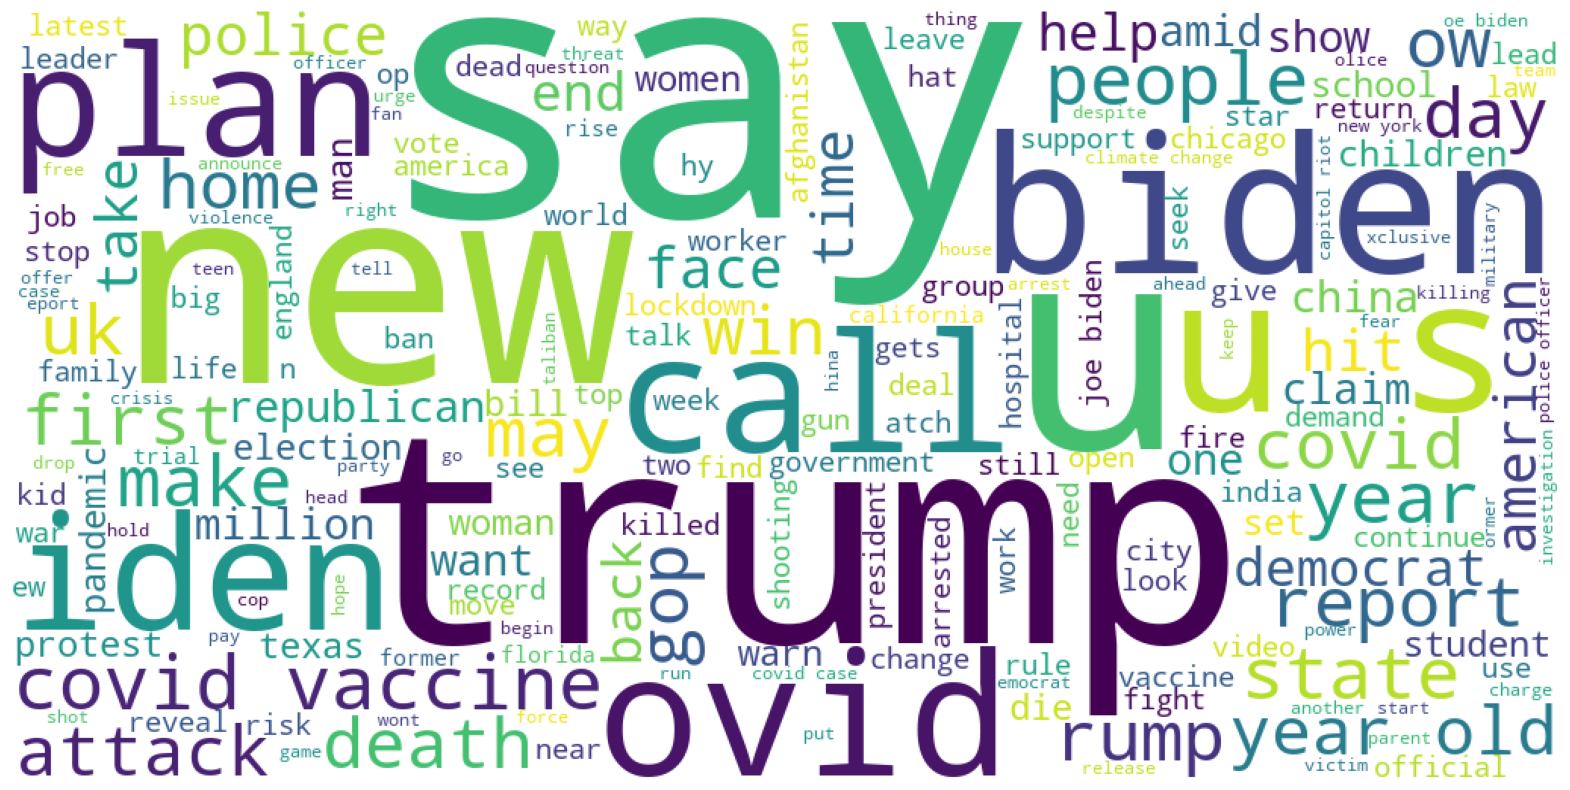

In [26]:
# wordcount

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
wordcloud = WordCloud(
                    background_color = 'white',
                    width = 1024,
                    height = 512
                        ).generate(' '.join(title_corpus))
        
plt.figure(figsize = (20,10))
plt.imshow(wordcloud, 
           aspect='auto'
          ) # image show
plt.axis('off') # to off the axis of x and y
plt.show()

In [27]:
# replicamos para content

content_corpus = []
contents = train_data_eda['content']
for i in tqdm(range(len(titles))):
    content = re.sub('^[a-zA-Z]', ' ', contents[i])

    char_to_replace = ['\'', '"', ':', ',', '`', '´', '’', '”']
    for char in char_to_replace:
        content = content.replace(char, '')
    # title = title.replace("'", '')
    # title = title.replace(":", '')
    content = content.lower()
    content = content.split()
    # quitamos stopwords
    content = [word for word in content if word not in stopwords.words('english')]
    content = ' '.join(content)
    content_corpus.append(content)

100%|██████████| 89795/89795 [1:42:41<00:00, 14.57it/s]  


In [28]:
content_corpus = " ".join(content_corpus).split(" ")
content_corpus[:20]

['ennedy',
 'center',
 'honoree',
 'joan',
 'baez',
 'reflects',
 '60',
 'years',
 'singing',
 'activism',
 '.',
 'speaks',
 '“',
 'cbs',
 '@',
 '@',
 '@',
 '@',
 '@',
 '.']

In [30]:
word_counter = dict(Counter(content_corpus))
title_df_counter = pd.DataFrame(
    data = {
            'word': [word for word in word_counter.keys()],
            'count': [number for number in word_counter.values()]
    }
)
title_df_counter = title_df_counter.sort_values('count', ascending=False)
title_df_counter.head(20)

,word,count
14,@,2916818
10,.,1328308
12,“,233522
94,said,174923
234,people,81606
171,would,69187
119,),68567
116,(,68154
218,one,68117
60,new,65609


In [36]:
title_df_counter['len_word'] = title_df_counter.apply(lambda x: len(x['word']) > 1, axis=1)
clean_title_df_counter = title_df_counter[title_df_counter['len_word'] == True].reset_index(drop=True)
clean_title_df_counter[['word', 'count']].head(20)

,word,count
0,said,174923
1,people,81606
2,would,69187
3,one,68117
4,new,65609
5,also,62969
6,state,49574
7,trump,49377
8,biden,47636
9,president,47185


# detect topics

Vamos a hacer un analisis de tematica y topics